In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read Data

In [2]:
df = pd.read_csv('Personal Bank Loan Classification.csv', sep=';')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Preprocessing

### Convert a ZIP code to a location

In [3]:
import pandas as pd
import zipcodes

def zip_to_location(zip_code):
    """
    Convert a ZIP code to a location string
    Handles invalid ZIP codes and special cases
    """
    # Handle NaN or None values
    if pd.isna(zip_code):
        return "Missing ZIP"

    # Convert to string and handle invalid ZIP codes
    zip_str = str(zip_code)
    if len(zip_str) < 5:
        return "Invalid ZIP"

    # Handle special cases
    if zip_code == 96651:
        return "IRS Processing Center, CA"

    try:
        # Use the zipcodes library to get location info
        info = zipcodes.matching(zip_str.zfill(5))[0]  # Ensure 5-digit format
        return f"{info['city']}"
    except (IndexError, KeyError):
        return "Unknown Location"

# Get unique ZIP codes and convert to locations
unique_zips = df['ZIP Code'].unique()
unique_locations = [zip_to_location(zip_code) for zip_code in unique_zips]

# Create a mapping dictionary for faster processing
zip_location_map = {zip_code: zip_to_location(zip_code) for zip_code in unique_zips}

# Add the location column to the original DataFrame
df['Location'] = df['ZIP Code'].map(zip_location_map)

In [4]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Location               object
dtype: object

In [5]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Location
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,Irvine
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,La Jolla
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,Ojai
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,Los Angeles
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1,Irvine


In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Location              0
dtype: int64

In [8]:
df.shape

(5000, 15)

In [9]:
df = df.drop('ID', axis=1)

In [10]:
df.shape

(5000, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Location            5000 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


In [12]:
df['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.drop_duplicates(inplace=True)

### Box plots to show outliers

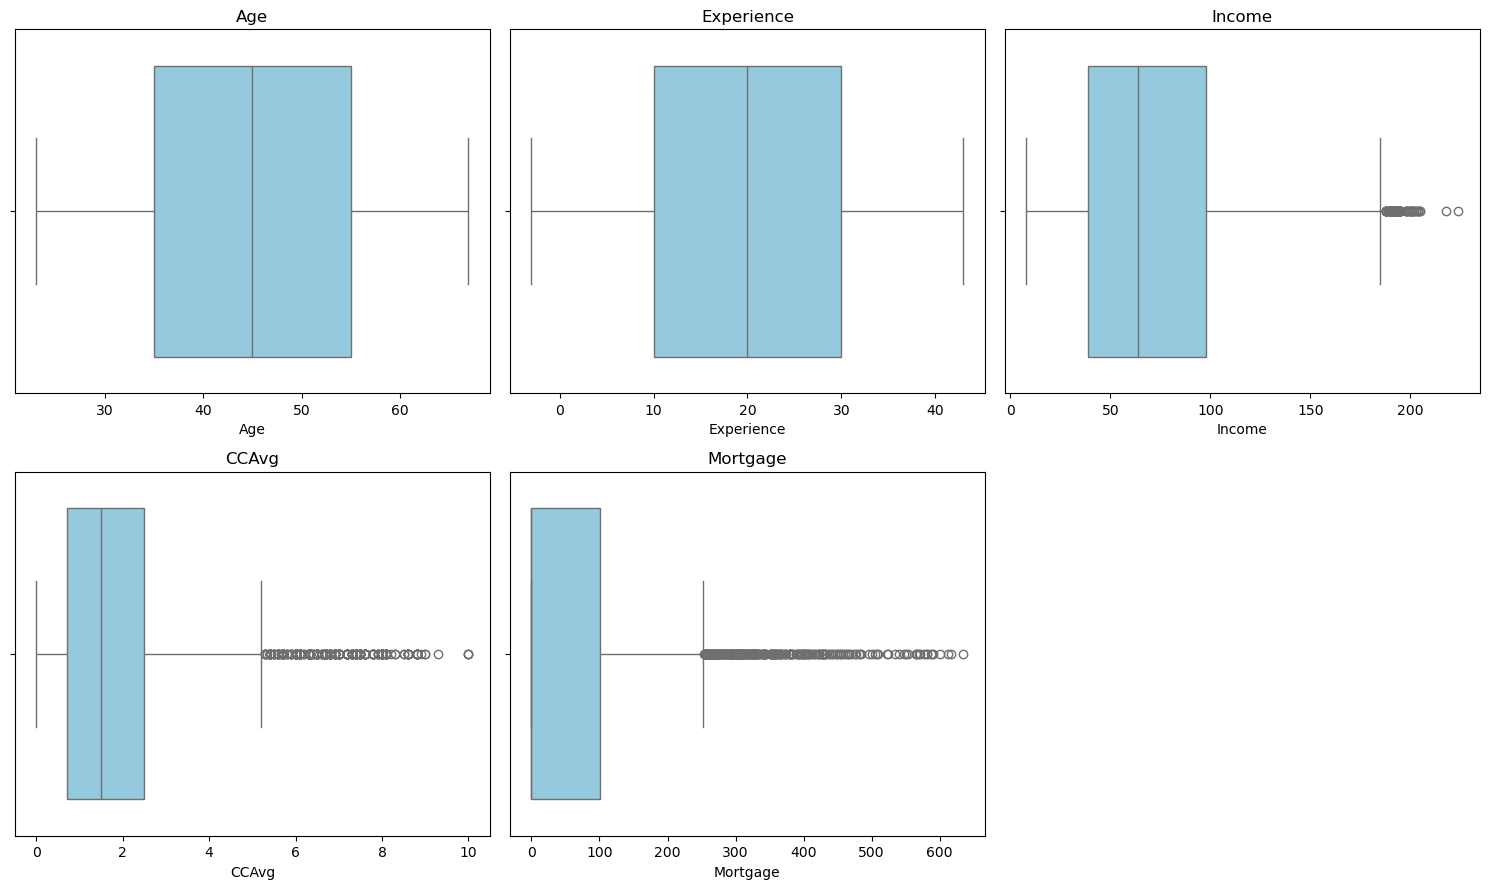

In [15]:
features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

rows = 2
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 9))

for i, col in enumerate(features):
    r = i // cols
    c = i % cols
    sns.boxplot(x=df[col], ax=axes[r, c], color='skyblue')
    axes[r, c].set_title(col)

for j in range(len(features), rows*cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [16]:
df['Mortgage'].value_counts()

Mortgage
0      3462
98       17
103      16
89       16
91       16
       ... 
550       1
283       1
612       1
590       1
541       1
Name: count, Length: 347, dtype: int64

## Visualizations

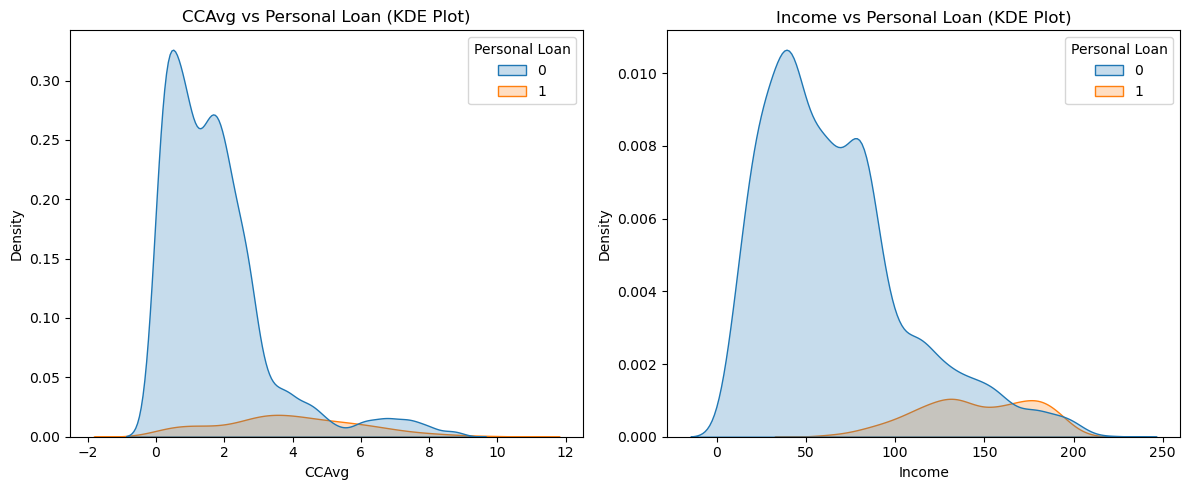

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1 - CCAvg KDE
sns.kdeplot(x='CCAvg', hue='Personal Loan', data=df, fill=True, ax=axes[0])
axes[0].set_title('CCAvg vs Personal Loan (KDE Plot)')
axes[0].set_xlabel('CCAvg')
axes[0].set_ylabel('Density')
# لو زودت الصرف بيزيد برضو


# 2 - Income KDE
sns.kdeplot(x='Income', hue='Personal Loan', data=df, fill=True, ax=axes[1])
axes[1].set_title('Income vs Personal Loan (KDE Plot)')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


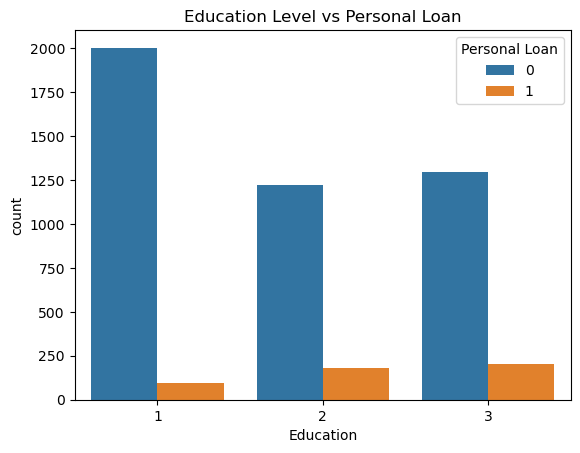

In [18]:
sns.countplot(x='Education', hue='Personal Loan', data=df)
plt.title('Education Level vs Personal Loan')
plt.show()
# كل متعليم بيزيد بياخد قرض

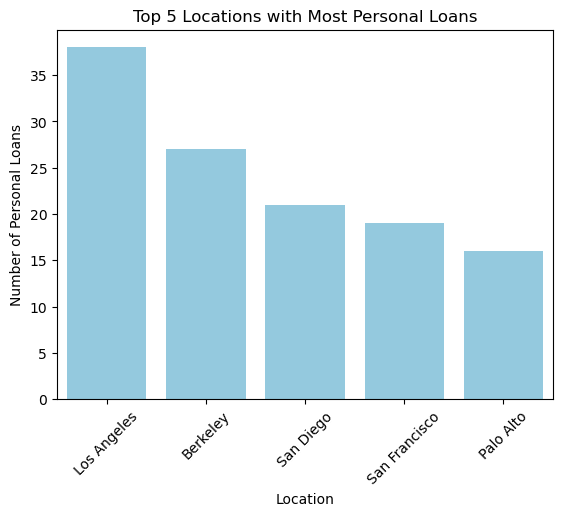

In [19]:
locations_df = df[['Location', 'Personal Loan']]

top_locations = (
    locations_df[locations_df['Personal Loan'] == 1]
    .groupby('Location')
    .size()
    .reset_index(name='Loan Count')
    .sort_values('Loan Count', ascending=False)
    .head(5)
)

sns.barplot(data=top_locations, x='Location', y='Loan Count', color='skyblue')
plt.title('Top 5 Locations with Most Personal Loans')
plt.ylabel('Number of Personal Loans')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.show()

# [Los Angeles] have the highest number of personal loan

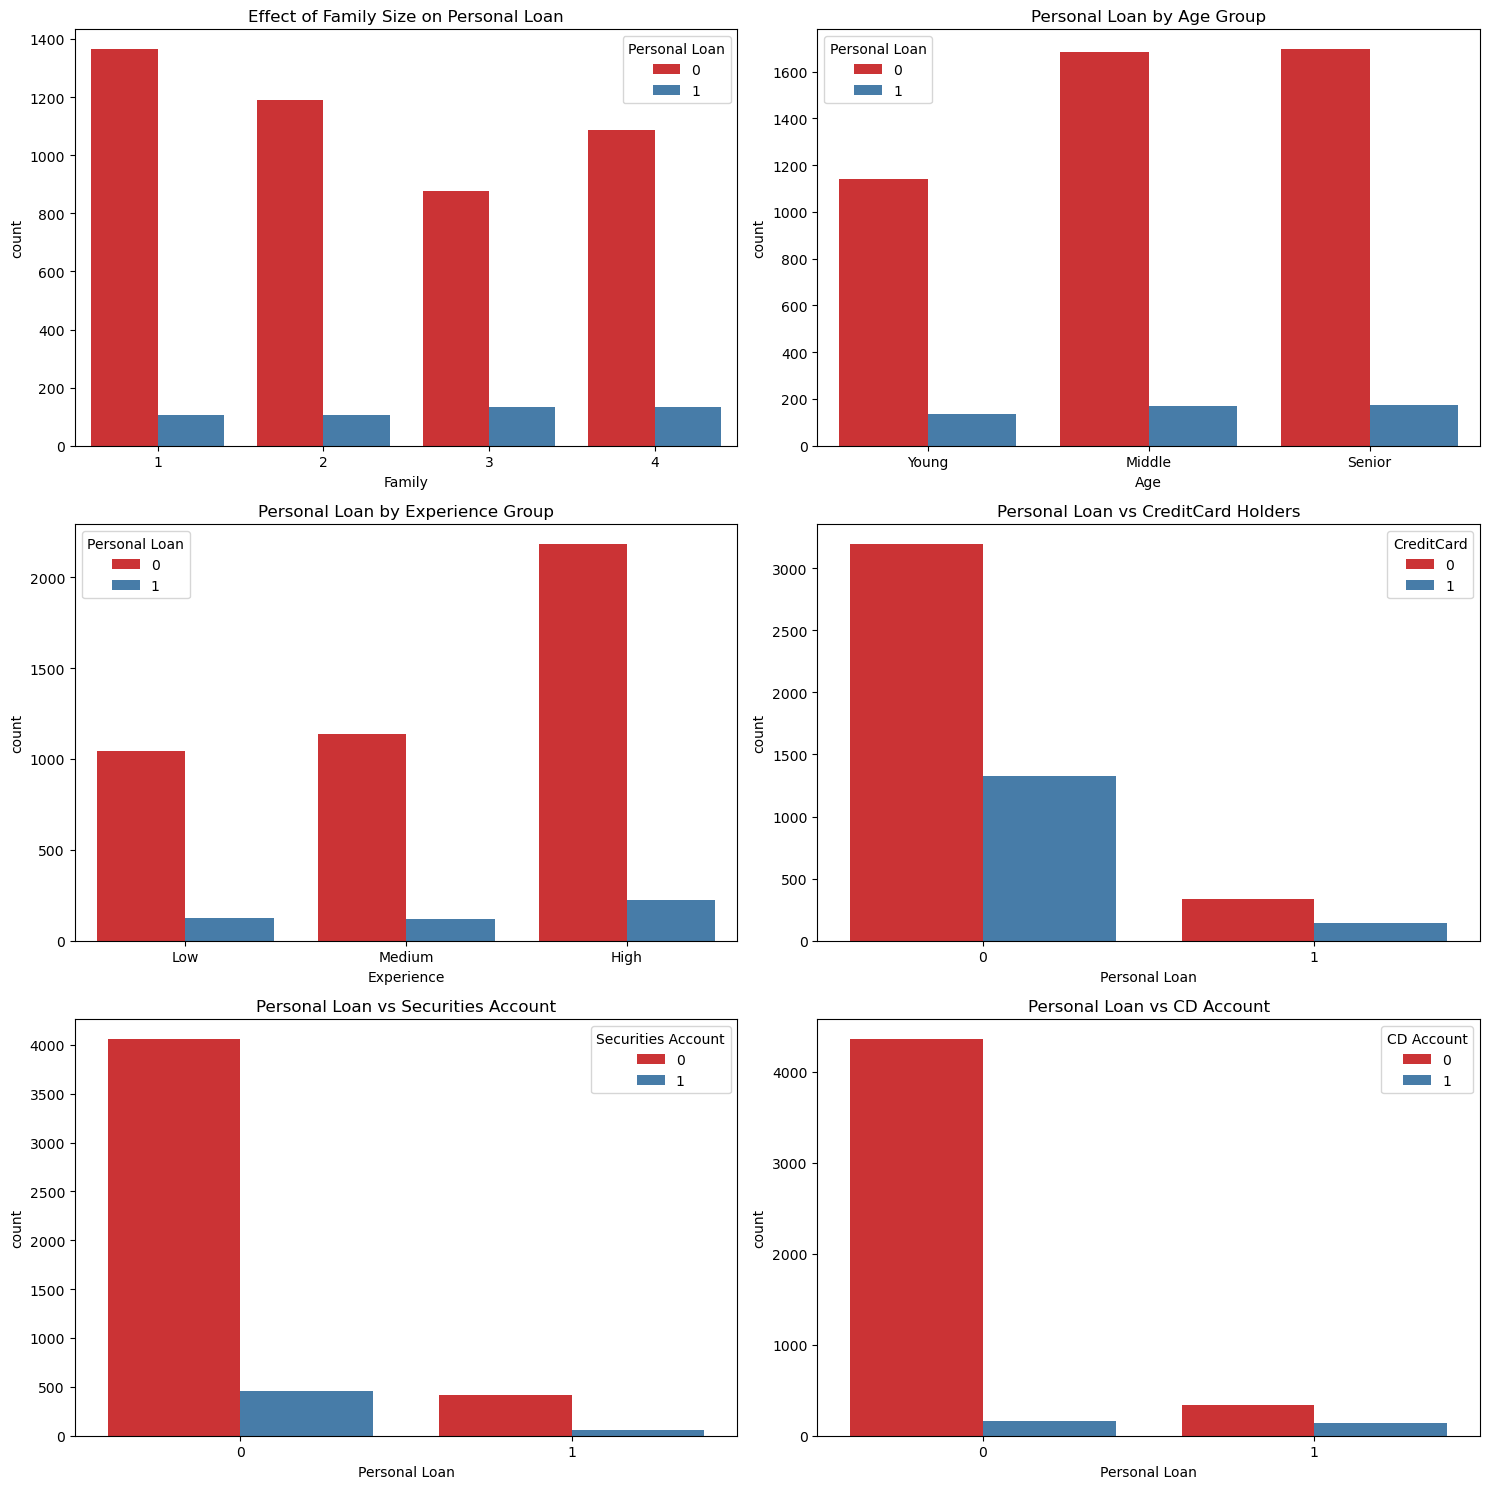

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

# 1 - Family Size
sns.countplot(x='Family', hue='Personal Loan', data=df, ax=axes[0],palette='Set1')
axes[0].set_title('Effect of Family Size on Personal Loan')

# 2 - Age Group
sns.countplot(
    x=pd.cut(df['Age'], bins=[20, 35, 50, 70], labels=['Young', 'Middle', 'Senior']),
    hue=df['Personal Loan'],
    palette='Set1',
    ax=axes[1]
)
axes[1].set_title('Personal Loan by Age Group')

# 3 - Experience Group
sns.countplot(
    x=pd.cut(df['Experience'], bins=[0, 10, 20, 40], labels=['Low', 'Medium', 'High']),
    hue=df['Personal Loan'],
    palette='Set1',
    ax=axes[2]
)
axes[2].set_title('Personal Loan by Experience Group')

# 4 - CreditCard
sns.countplot(x='Personal Loan', hue='CreditCard', data=df, palette='Set1', ax=axes[3])
axes[3].set_title('Personal Loan vs CreditCard Holders')

# 5 - Securities Account
sns.countplot(x='Personal Loan', hue='Securities Account', data=df, palette='Set1', ax=axes[4])
axes[4].set_title('Personal Loan vs Securities Account')

# 6 - CD Account
sns.countplot(x='Personal Loan', hue='CD Account', data=df, palette='Set1', ax=axes[5])
axes[5].set_title('Personal Loan vs CD Account')

plt.tight_layout()
plt.show()


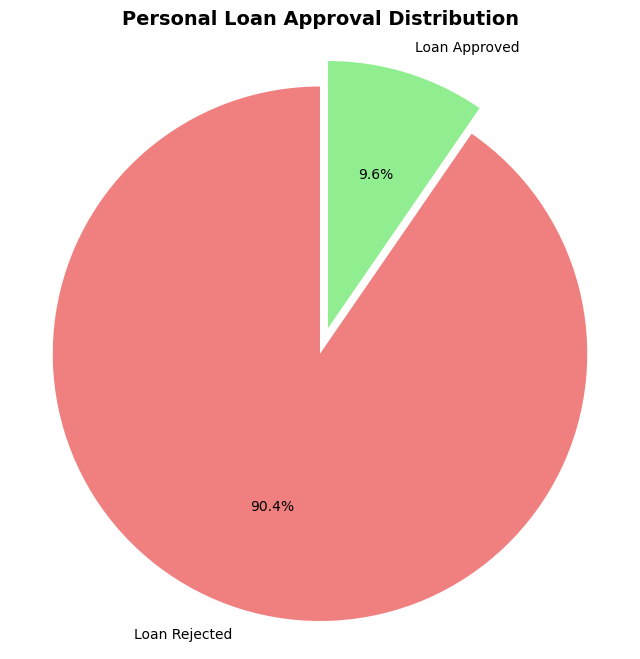

Loan Distribution:
Rejected: 4,520 customers (90.4%)
Approved: 480 customers (9.6%)


In [21]:
loan_counts = df['Personal Loan'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(loan_counts.values,
        labels=['Loan Rejected', 'Loan Approved'],
        autopct='%1.1f%%',
        colors=['lightcoral', 'lightgreen'],
        startangle=90,
        explode=(0.1, 0))
plt.title('Personal Loan Approval Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()
print("Loan Distribution:")
print(f"Rejected: {loan_counts[0]:,} customers ({loan_counts[0]/loan_counts.sum()*100:.1f}%)")
print(f"Approved: {loan_counts[1]:,} customers ({loan_counts[1]/loan_counts.sum()*100:.1f}%)")

In [22]:
df = df.drop(['ZIP Code','Location'], axis=1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


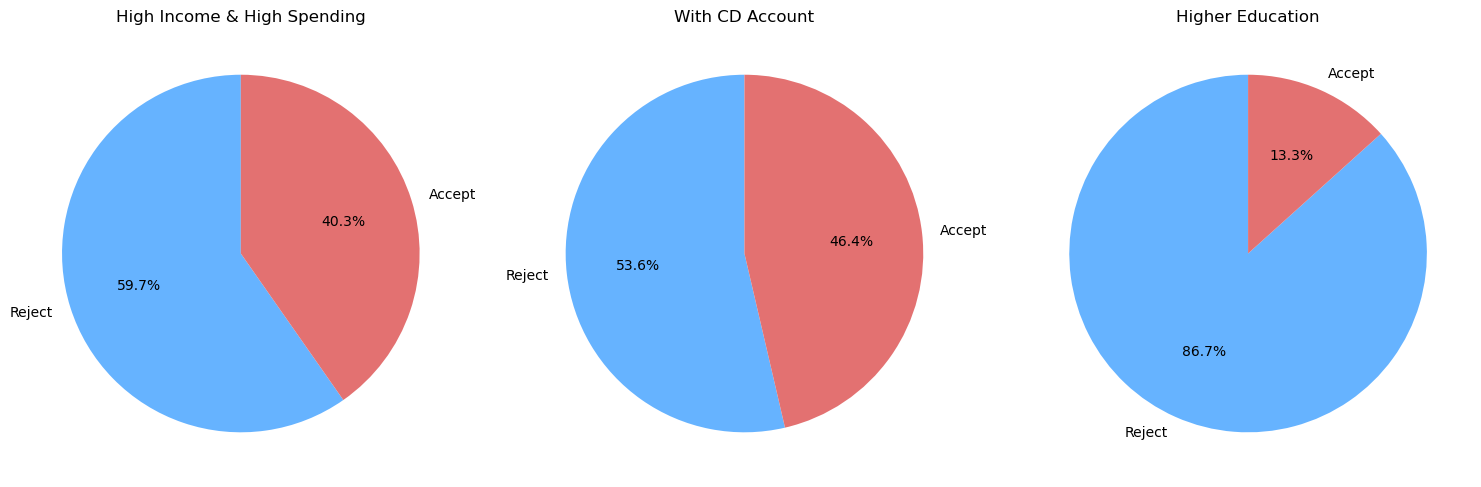

In [23]:
# ----- Subset 1 -----
subset = df[(df["Income"] > 100) & (df["CCAvg"] > 2)]
counts = subset["Personal Loan"].value_counts()

# ----- Subset 2 -----
subset_cd = df[df["CD Account"] == 1]
counts_cd = subset_cd["Personal Loan"].value_counts()

# ----- Subset 3 -----
subset_edu = df[df["Education"] > 1]
counts_edu = subset_edu["Personal Loan"].value_counts()

# ----- Plot -----
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colors = ["#66b3ff", "#e37171"]

# Chart 1
axes[0].pie(counts, labels=["Reject", "Accept"], autopct="%.1f%%", startangle=90, colors=colors)
axes[0].set_title("High Income & High Spending")

# Chart 2
axes[1].pie(counts_cd, labels=["Reject", "Accept"], autopct="%.1f%%", startangle=90, colors=colors)
axes[1].set_title("With CD Account")

# Chart 3
axes[2].pie(counts_edu, labels=["Reject", "Accept"], autopct="%.1f%%", startangle=90, colors=colors)
axes[2].set_title("Higher Education")

plt.tight_layout()
plt.show()

### Heat map to see coorelations

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
Experience           -0.007413
Age                  -0.007726
Name: Personal Loan, dtype: float64


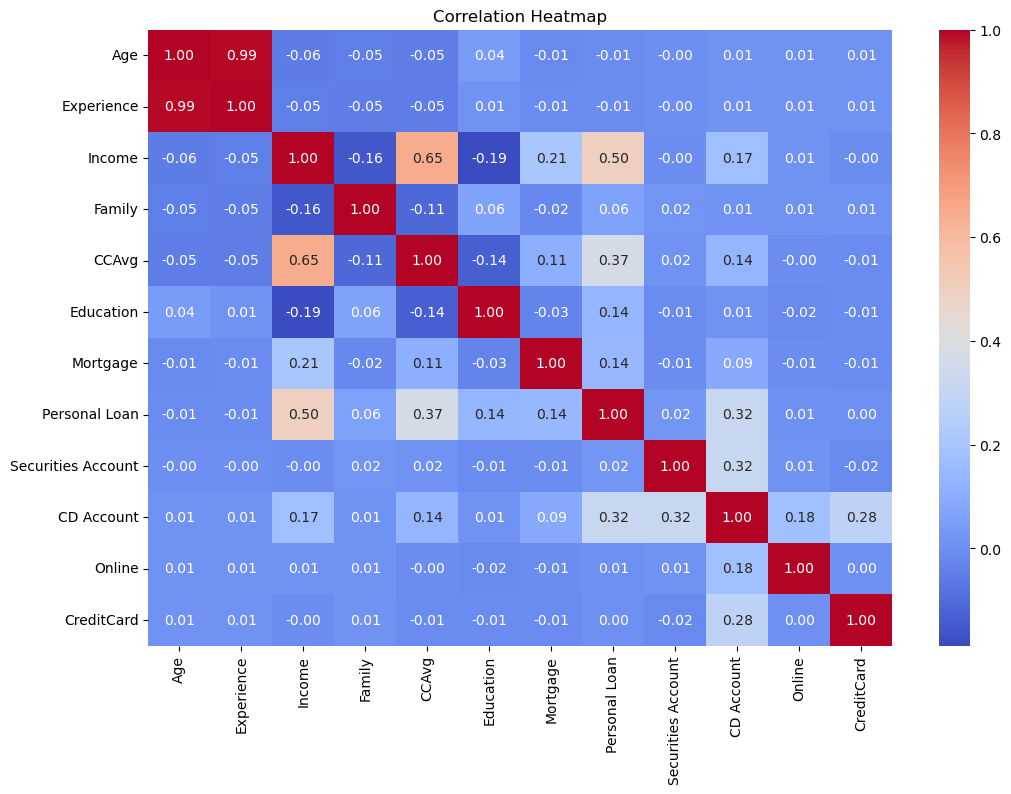

In [24]:
corr = df.corr()

print(corr['Personal Loan'].sort_values(ascending=False))

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
# income ,ccavg ارتباط عالي
# اللي بياثر income ,ccavg ,cd account

In [25]:
df = df.drop(["Age", "Online", "CreditCard", "Securities Account",'Family'], axis=1)
print(df.head())
print(df.columns)

   Experience  Income  CCAvg  Education  Mortgage  Personal Loan  CD Account
0           1      49    1.6          1         0              0           0
1          19      34    1.5          1         0              0           0
2          15      11    1.0          1         0              0           0
3           9     100    2.7          2         0              0           0
4           8      45    1.0          2         0              0           0
Index(['Experience', 'Income', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'CD Account'],
      dtype='object')


---

# MODELS

#### Split Data

In [26]:
X = df.drop("Personal Loan", axis=1)
y = df["Personal Loan"]

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Use Smote Method to generate more data for the lower value (Accepted Loans)
- ### Because data is Unbalanced and Biased for the greatest value (Rejected Loans)

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

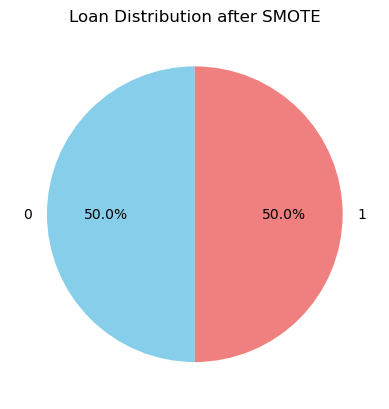

In [29]:
counts = y_train.value_counts()

labels = counts.index.astype(str)
sizes = counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Loan Distribution after SMOTE")
plt.show()

#### Make Feature scalling to the data

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

---

 # logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_train = log_reg.predict(X_train_scaled)
y_pred_test = log_reg.predict(X_test_scaled)

print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test Accuracy:", accuracy_score(y_test, y_pred_test))


Train Accuracy: 0.8716
Test Accuracy: 0.8752


#### Use Cross_Validation and get the average accuracy of each fold

In [32]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring="accuracy")
print("Cross Validation Accuracy (per fold):", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross Validation Accuracy (per fold): [0.86196769 0.86417034 0.86196769 0.88096988 0.88464364]
Mean CV Accuracy: 0.8707438492686448


#### Use confusion_matrix, classification_report to see accuracy

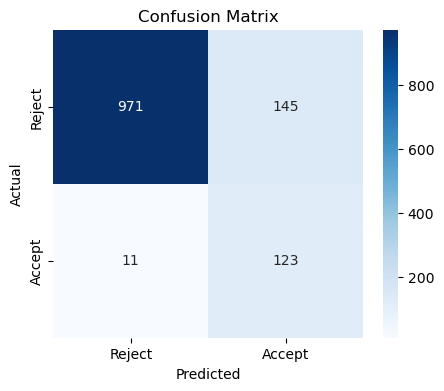

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Reject", "Accept"], yticklabels=["Reject", "Accept"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [34]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_test, target_names=["Reject", "Accept"]))


Classification Report:
               precision    recall  f1-score   support

      Reject       0.99      0.87      0.93      1116
      Accept       0.46      0.92      0.61       134

    accuracy                           0.88      1250
   macro avg       0.72      0.89      0.77      1250
weighted avg       0.93      0.88      0.89      1250



---

# KNN Model

#### Grid Search

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 31))}

grid_search = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("Best k:", grid_search.best_params_['n_neighbors'])
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best k: 1
Best Cross-Validation Accuracy: 0.9601965169861929


In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


y_pred_train = knn.predict(X_train_scaled)
y_pred_test = knn.predict(X_test_scaled)

print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test Accuracy:", accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.9652
Test Accuracy: 0.9144


#### Use Cross_Validation and get the average accuracy of each fold

In [37]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring="accuracy")
print("Cross Validation Accuracy (per fold):", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross Validation Accuracy (per fold): [0.93318649 0.94346549 0.93685756 0.94783248 0.94856723]
Mean CV Accuracy: 0.9419818501771069


#### Use confusion_matrix, classification_report to see accuracy

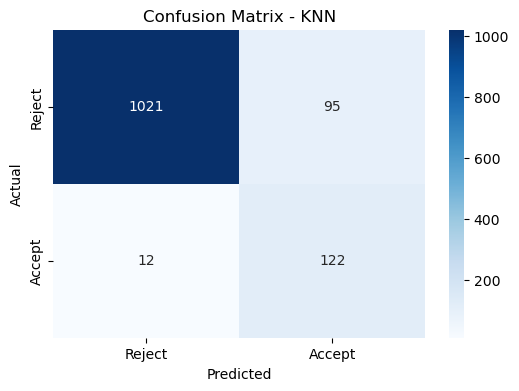

In [38]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Reject", "Accept"], yticklabels=["Reject", "Accept"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

In [39]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      1116
           1       0.56      0.91      0.70       134

    accuracy                           0.91      1250
   macro avg       0.78      0.91      0.82      1250
weighted avg       0.94      0.91      0.92      1250



---

 # decision tree

#### Grid Search

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(
    dt,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9553462783800025


In [41]:
dt=DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt.fit(X_train_scaled, y_train)


y_pred_train = dt.predict(X_train_scaled)
y_pred_test = dt.predict(X_test_scaled)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.9998531139835488
Test Accuracy: 0.952


#### Use Cross_Validation and get the average accuracy of each fold

In [42]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring="accuracy")
print("Cross Validation Accuracy (per fold):", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross Validation Accuracy (per fold): [0.95668135 0.96035242 0.95154185 0.96032329 0.94783248]
Mean CV Accuracy: 0.9553462783800025


#### Use confusion_matrix, classification_report to see accuracy

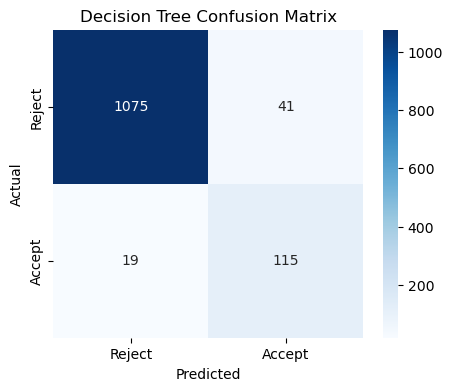

In [43]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Reject','Accept'], yticklabels=['Reject','Accept'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [44]:
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1116
           1       0.74      0.86      0.79       134

    accuracy                           0.95      1250
   macro avg       0.86      0.91      0.88      1250
weighted avg       0.96      0.95      0.95      1250



---

# Random forest

#### Grid Search

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.9690082765005


In [46]:
model = RandomForestClassifier(n_estimators=200 ,min_samples_split=2, criterion='gini' , max_depth=None, random_state=0)
model.fit(X_train_scaled,y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

print(f'Train Accuracy Score : {accuracy_score(y_train,y_pred_train):.4f}')
print(f'Test Accuracy Score : {accuracy_score(y_test,y_pred_test)}')

Train Accuracy Score : 0.9999
Test Accuracy Score : 0.9608


#### Use Cross_Validation and get the average accuracy of each fold

In [47]:
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring="accuracy")
print("Cross Validation Accuracy (per fold):", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross Validation Accuracy (per fold): [0.96328928 0.96402349 0.96696035 0.97575312 0.96914034]
Mean CV Accuracy: 0.9678333176887947


#### Use confusion_matrix, classification_report to see accuracy

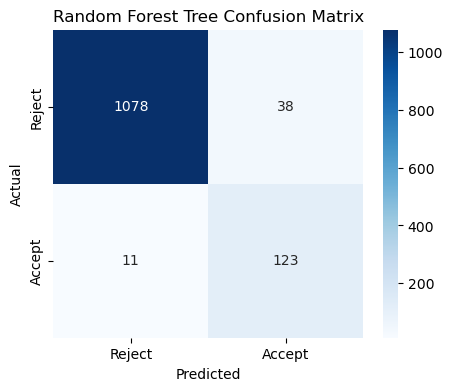

In [48]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Reject','Accept'], yticklabels=['Reject','Accept'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Tree Confusion Matrix")
plt.show()

In [49]:
cr=classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1116
           1       0.76      0.92      0.83       134

    accuracy                           0.96      1250
   macro avg       0.88      0.94      0.91      1250
weighted avg       0.97      0.96      0.96      1250



In [50]:
from xgboost import XGBClassifier


In [51]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# موديل XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# باراميتر جريد
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(
    xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# تدريب
grid_search.fit(X_train_scaled, y_train)

# أفضل باراميترات
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 50, 'subsample': 1.0}
Best Accuracy: 0.9740022290770476


c:\Users\Mohamed\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:28:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [52]:
xgb = XGBClassifier(
    n_estimators=50,
    max_depth=10,
    learning_rate=0.3,
    scale_pos_weight= (len(y_train[y_train==0]) / len(y_train[y_train==1])),
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(x_train, y_train)

y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}\n")

Train Accuracy: 0.9994
Test Accuracy: 0.9616



c:\Users\Mohamed\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:28:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#### Use Cross_Validation and get the average accuracy of each fold

In [53]:
cv_scores = cross_val_score(xgb, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Accuracy Scores: [0.96108664 0.97209985 0.97283407 0.96840558 0.97648788]
Mean CV Accuracy: 0.970182803738721


#### Use confusion_matrix, classification_report to see accuracy

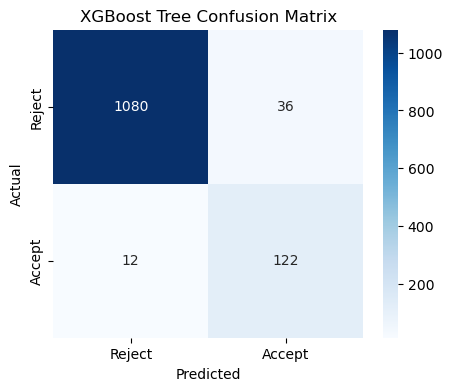

In [54]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Reject','Accept'], yticklabels=['Reject','Accept'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Tree Confusion Matrix")
plt.show()

In [55]:
print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred_test))
#xgboost احسن فال precision انه يتوقع غلط و f1_score من random forest
# precision reduce false positive
# reduce over fit less than 4 %
# random is 6 %

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1116
           1       0.77      0.91      0.84       134

    accuracy                           0.96      1250
   macro avg       0.88      0.94      0.91      1250
weighted avg       0.97      0.96      0.96      1250



## Feature Importance for Loan Approval

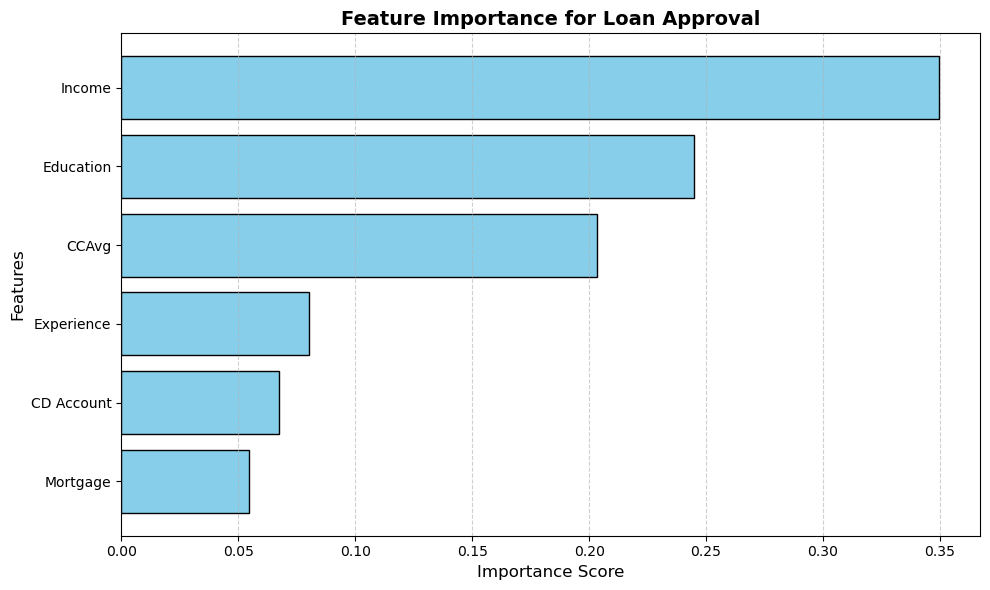

In [56]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color="skyblue", edgecolor="black")
plt.title('Feature Importance for Loan Approval', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

من الداتا دي، أكتر أسباب الرفض شيوعًا هي:

دخل قليل بالنسبة للقرض المطلوب.

قيمة قرض عالية أو مدة غير مناسبة.

عدد معالين كبير.

في بعض البنوك، المؤهل التعليمي بيأثر على التقييم

In [57]:
import pickle
with open("loan_model1.pkl", "wb") as f:
    pickle.dump(log_reg, f)
print("✅ Model trained and saved as loan_model1.pkl")


with open("loan_model2.pkl", "wb") as f:
    pickle.dump(knn, f)
print("✅ Model trained and saved as loan_model2.pkl")


with open("loan_model3.pkl", "wb") as f:
    pickle.dump(dt, f)
print("✅ Model trained and saved as loan_model3.pkl")


with open("loan_model4.pkl", "wb") as f:
    pickle.dump(rf, f)
print("✅ Model trained and saved as loan_model4.pkl")


with open("loan_model5.pkl", "wb") as f:
    pickle.dump(xgb, f)
print("✅ Model trained and saved as loan_model5.pkl")

✅ Model trained and saved as loan_model1.pkl
✅ Model trained and saved as loan_model2.pkl
✅ Model trained and saved as loan_model3.pkl
✅ Model trained and saved as loan_model4.pkl
✅ Model trained and saved as loan_model5.pkl
